# UQ Paper Images

In [1]:
from Algorithms.bayescg import *
from Algorithms.bayescg_k import *
from Algorithms.utilities import *
from Algorithms.a_lanczos import *
from Algorithms.matrix2tabular import *
from Algorithms.test_statistics_plots import *
import numpy
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import stats
from scipy.io import mmread
import time

seed = 1
numpy.random.seed(seed)
plt.rcParams.update({'font.size': 16})

## Setting up the matrix $A$ 

In [2]:
A = mmread('Matrices/bcsstk14_prec.mtx')

#N = 11948   #BCSSTK18
N = 1806   #BCSSTK14


U,S,VH = linalg.svd(A.todense())
SqrtA = (U*(S**(1/2)))@VH
InvA = (VH.T*(S**(-1)))@U.T
SqrtInvA = (VH.T*(S**(-1/2)))@U.T
sqrt_prior = SqrtInvA

NormA = max(S)

def AVec(w):
    return A.dot(w)

def InvAVec(w):
    return InvA@w

def SqrtAVec(w):
    return SqrtA@w


In [3]:
np.random.seed(seed)

legend = False
tol = 1e-14

#xTrue = np.random.randn(N)
#xTrue = np.ones(N)
xTrue = mv_normal(np.zeros(N),SqrtInvA)
b = AVec(xTrue)
x0 = np.zeros(N)


## Inverse Prior

S statistic results 
 
$ 10.0 $ & $ 53.0 $ & $ 1.8 \times 10^{3} $ & $ 5.22 \times 10^{-12} $ \\
$ 100.0 $ & $ 0.54 $ & $ 1.71 \times 10^{3} $ & $ 0.466 $ \\
$ 300.0 $ & $ 3.06 \times 10^{-6} $ & $ 1.61 \times 10^{3} $ & $ 1.19 $ \\


 Z statistic results 
 
$ 10.0 $ & $ 52.5 $ & $ 1.8 \times 10^{3} $ & $ 1.0 $ \\
$ 100.0 $ & $ 0.509 $ & $ 1.72 \times 10^{3} $ & $ 1.0 $ \\
$ 300.0 $ & $ 7.61 \times 10^{-6} $ & $ 1.56 \times 10^{3} $ & $ 1.0 $ \\



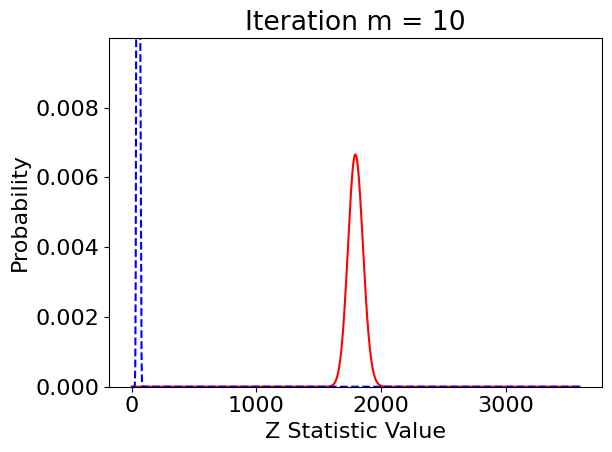

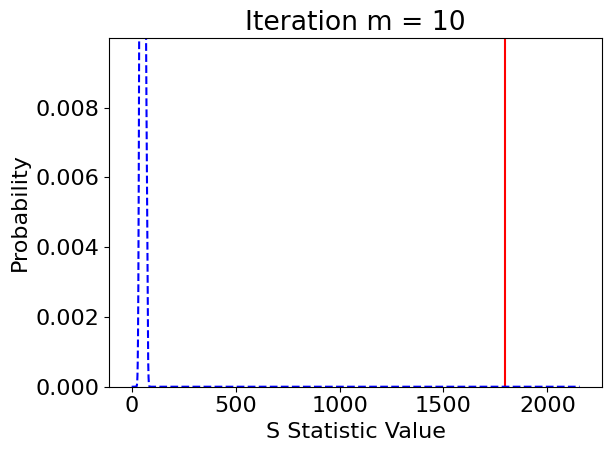

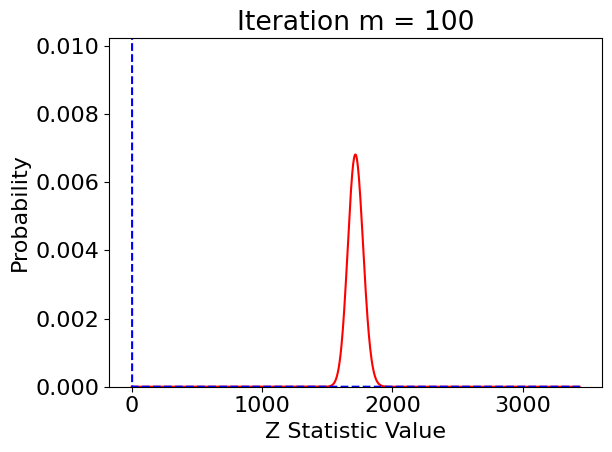

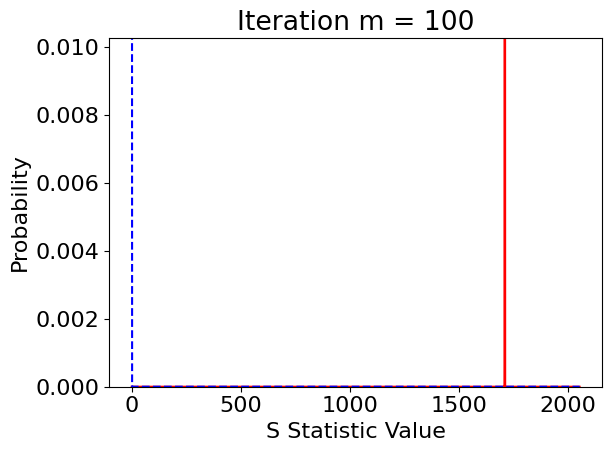

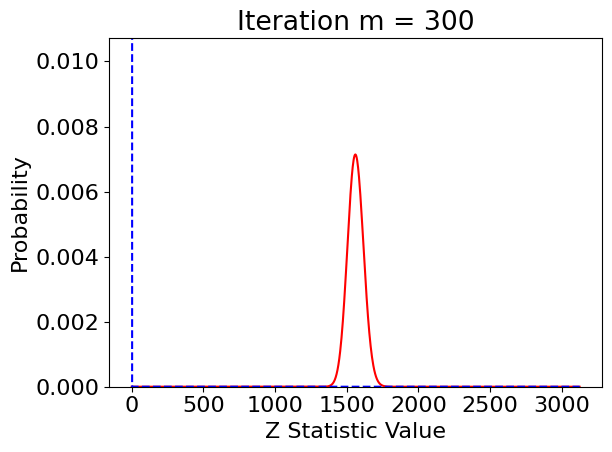

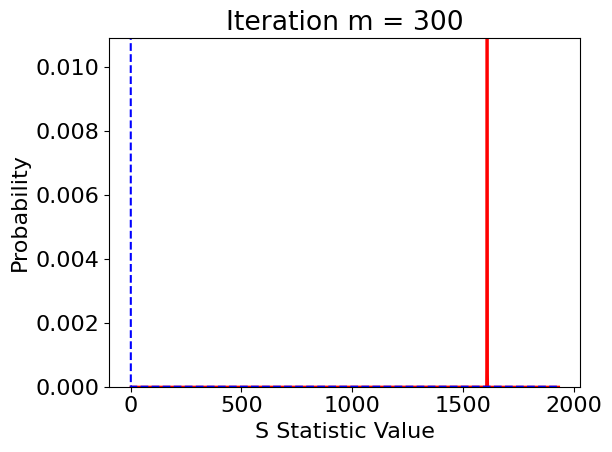

In [4]:
reorth = False
random_search = False
hist_z = False
post_rank = None
samples = 50
it = [10,100,300]

s_tab,z_tab = test_statistics_plots(AVec, x0, sqrt_prior, it, samples, reorth, 
                                    post_rank, random_search, hist_z, tol, legend=legend, seed=seed)

print("S statistic results \n ")
print(matrix2tabular(s_tab))
print("\n Z statistic results \n ")
print(matrix2tabular(z_tab))


plt.figure(1)
#plt.savefig('UQ-Images/Inv_Z_1.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/Inv_S_1.pdf')
plt.figure(3)
#plt.savefig('UQ-Images/Inv_Z_10.pdf')
plt.figure(4)
#plt.savefig('UQ-Images/Inv_S_10.pdf')
plt.figure(5)
#plt.savefig('UQ-Images/Inv_Z_80.pdf')
plt.figure(6)
#plt.savefig('UQ-Images/Inv_S_80.pdf')



## Krylov Prior with Full Posterior

S statistic results 
 
$ 10.0 $ & $ 53.0 $ & $ 53.0 $ & $ 8.48 $ \\
$ 100.0 $ & $ 0.522 $ & $ 0.522 $ & $ 0.255 $ \\
$ 300.0 $ & $ 8.34 \times 10^{-7} $ & $ 8.34 \times 10^{-7} $ & $ 3.52 \times 10^{-7} $ \\


 Z statistic results 
 
$ 10.0 $ & $ 631.0 $ & $ 565.0 $ & $ 0.925 $ \\
$ 100.0 $ & $ 509.0 $ & $ 448.0 $ & $ 0.774 $ \\
$ 300.0 $ & $ 201.0 $ & $ 152.0 $ & $ 0.93 $ \\



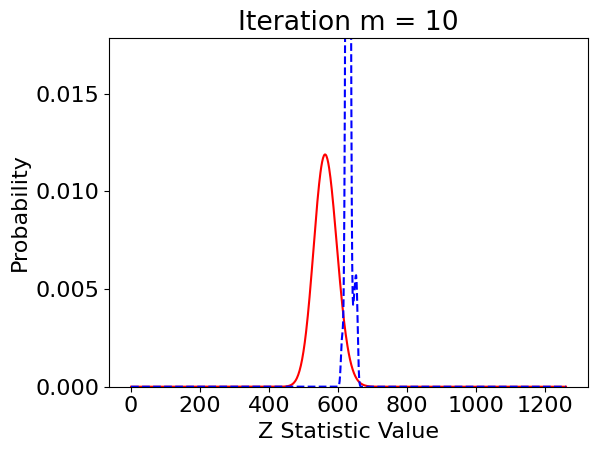

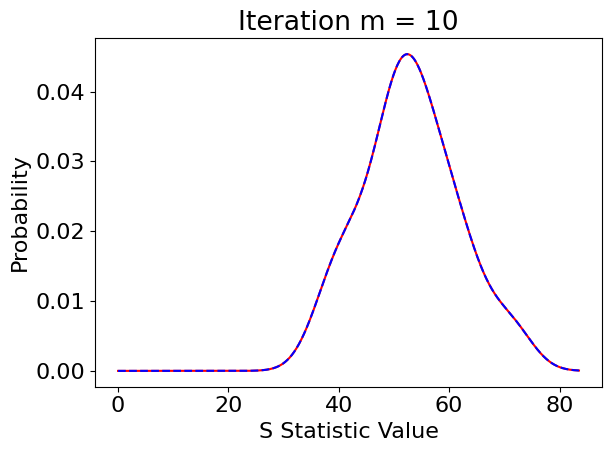

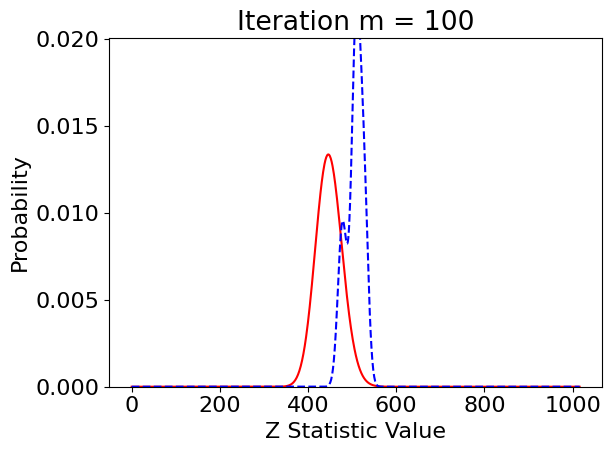

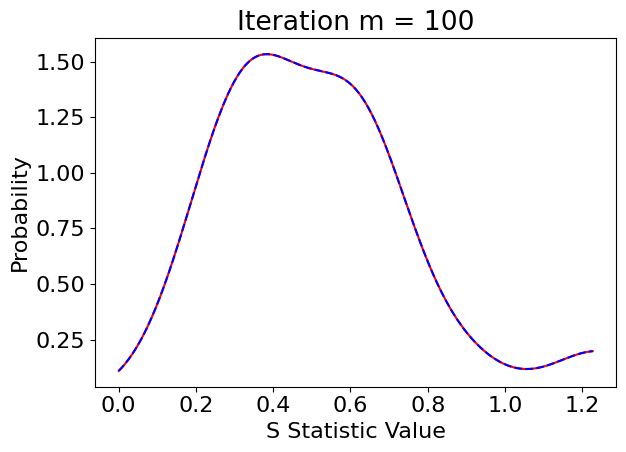

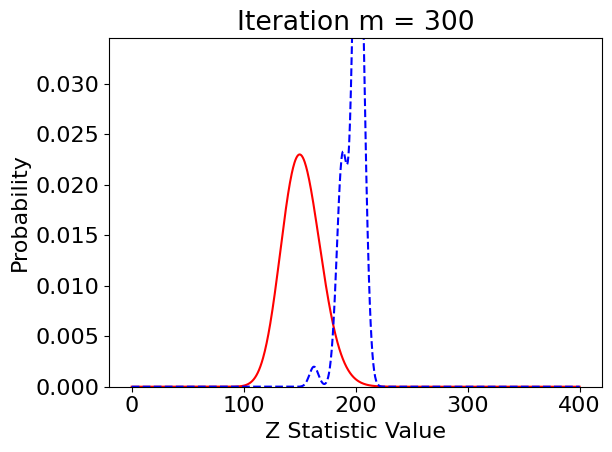

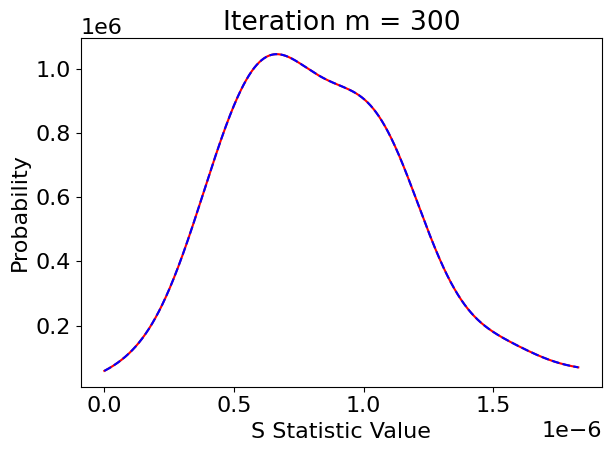

In [5]:
reorth = True
random_search = False
hist_z = False
post_rank = N
samples = 50
it = [10,100,300]

s_tab,z_tab = test_statistics_plots(AVec, x0, sqrt_prior, it, samples, reorth, 
                                    post_rank, random_search, hist_z, tol, legend=legend, seed=seed)

print("S statistic results \n ")
print(matrix2tabular(s_tab))
print("\n Z statistic results \n ")
print(matrix2tabular(z_tab))


plt.figure(1)
#plt.savefig('UQ-Images/Kry_Z_1.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/Kry_S_1.pdf')
plt.figure(3)
#plt.savefig('UQ-Images/Kry_Z_10.pdf')
plt.figure(4)
#plt.savefig('UQ-Images/Kry_S_10.pdf')
plt.figure(5)
#plt.savefig('UQ-Images/Kry_Z_80.pdf')
plt.figure(6)
#plt.savefig('UQ-Images/Kry_S_80.pdf')



## Krylov Prior with Approximate Posterior

S statistic results 
 
$ 10.0 $ & $ 53.0 $ & $ 49.8 $ & $ 7.96 $ \\
$ 100.0 $ & $ 0.538 $ & $ 0.489 $ & $ 0.251 $ \\
$ 300.0 $ & $ 2.97 \times 10^{-6} $ & $ 2.89 \times 10^{-6} $ & $ 1.51 \times 10^{-6} $ \\


 Z statistic results 
 
$ 10.0 $ & $ 314.0 $ & $ 50.0 $ & $ 1.0 $ \\
$ 100.0 $ & $ 340.0 $ & $ 50.0 $ & $ 1.0 $ \\
$ 300.0 $ & $ 164.0 $ & $ 50.0 $ & $ 1.0 $ \\



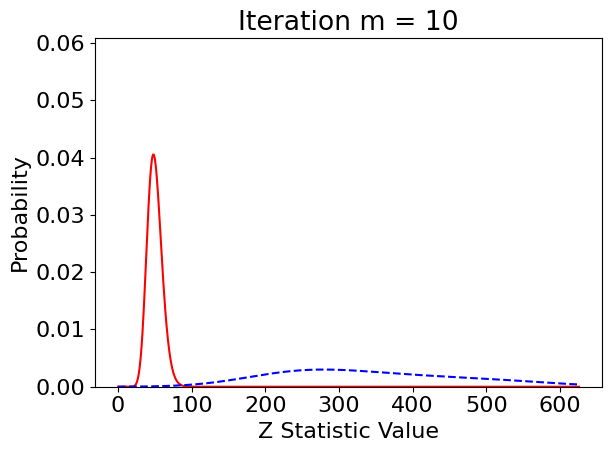

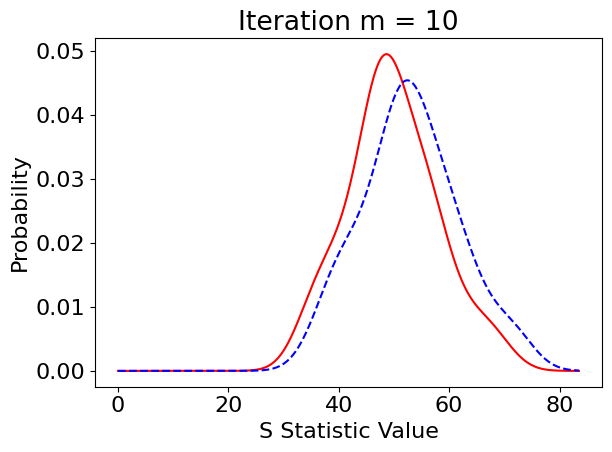

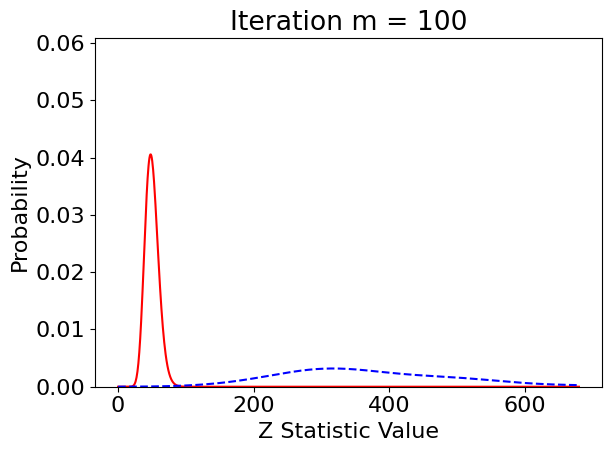

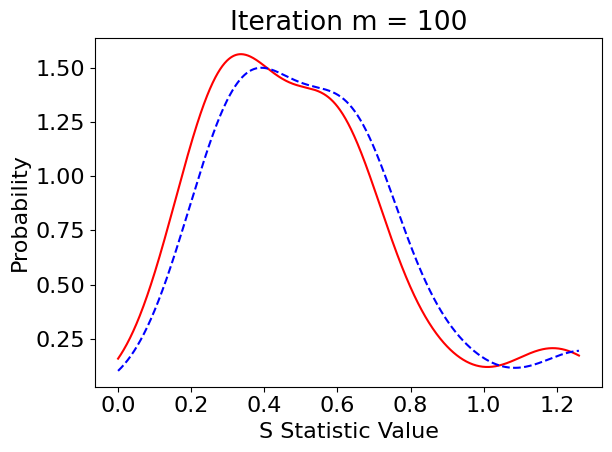

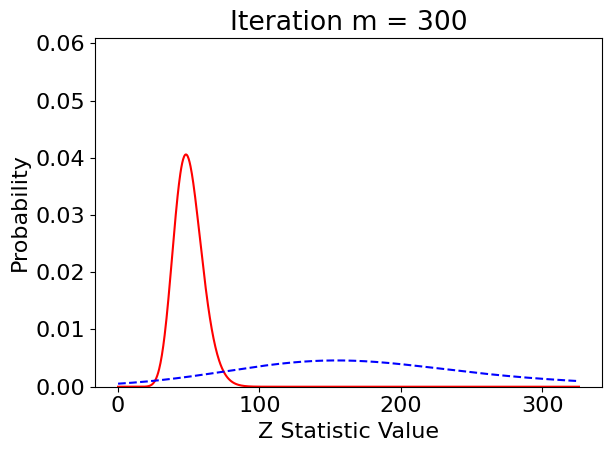

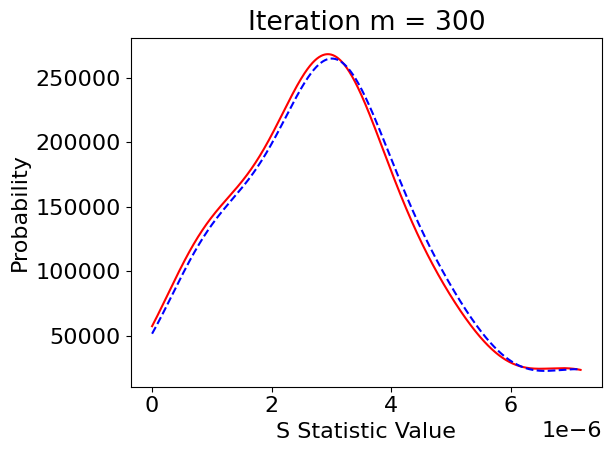

In [6]:
reorth = False
random_search = False
hist_z = False
post_rank = 50
samples = 50
it = [10,100,300]

s_tab,z_tab = test_statistics_plots(AVec, x0, sqrt_prior, it, samples, reorth, 
                                    post_rank, random_search, hist_z, tol, legend=legend, advanced_mean=False, seed=seed)

print("S statistic results \n ")
print(matrix2tabular(s_tab))
print("\n Z statistic results \n ")
print(matrix2tabular(z_tab))

plt.figure(1)
#plt.savefig('UQ-Images/Kry15_Z_1NR.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/Kry15_S_1NR.pdf')
plt.figure(3)
#plt.savefig('UQ-Images/Kry15_Z_10NR.pdf')
plt.figure(4)
#plt.savefig('UQ-Images/Kry15_S_10NR.pdf')
plt.figure(5)
#plt.savefig('UQ-Images/Kry15_Z_80NR.pdf')
plt.figure(6)
#plt.savefig('UQ-Images/Kry15_S_80NR.pdf')

## Krylov Prior with Advanced Approximate Posterior

S statistic results 
 
$ 10.0 $ & $ 3.21 $ & $ 49.8 $ & $ 7.96 $ \\
$ 100.0 $ & $ 4.88 \times 10^{-2} $ & $ 0.489 $ & $ 0.251 $ \\
$ 300.0 $ & $ 8.66 \times 10^{-8} $ & $ 2.89 \times 10^{-6} $ & $ 1.51 \times 10^{-6} $ \\


 Z statistic results 
 
$ 10.0 $ & $ 233.0 $ & $ 50.0 $ & $ 1.0 $ \\
$ 100.0 $ & $ 258.0 $ & $ 50.0 $ & $ 0.999 $ \\
$ 300.0 $ & $ 94.4 $ & $ 50.0 $ & $ 0.692 $ \\



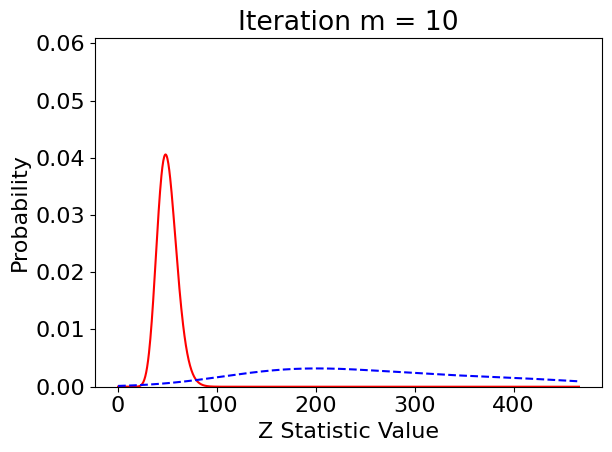

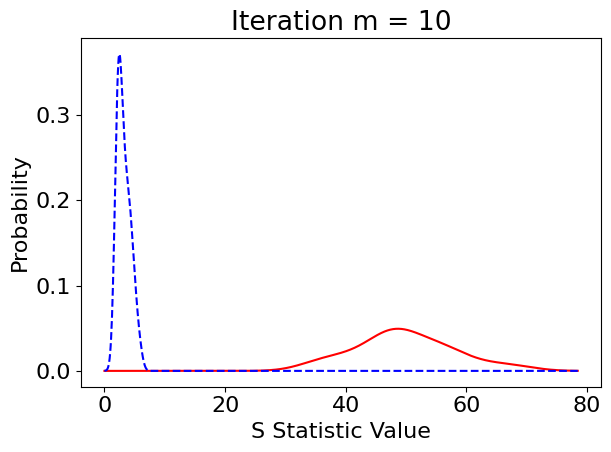

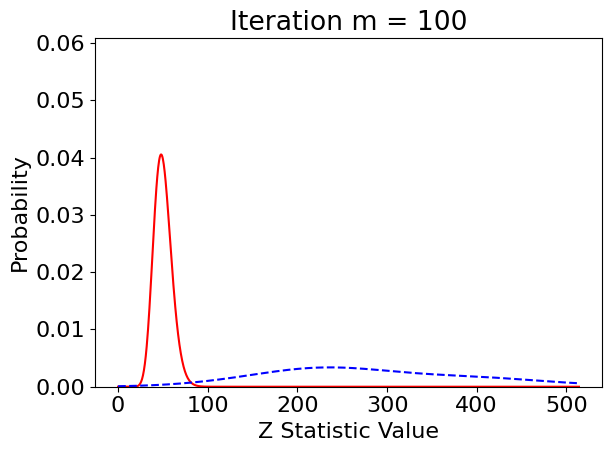

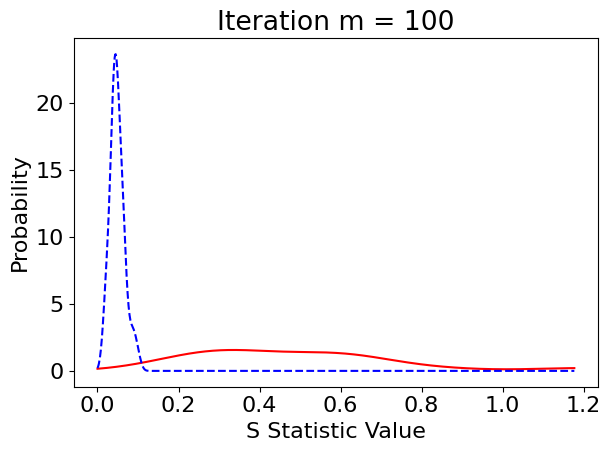

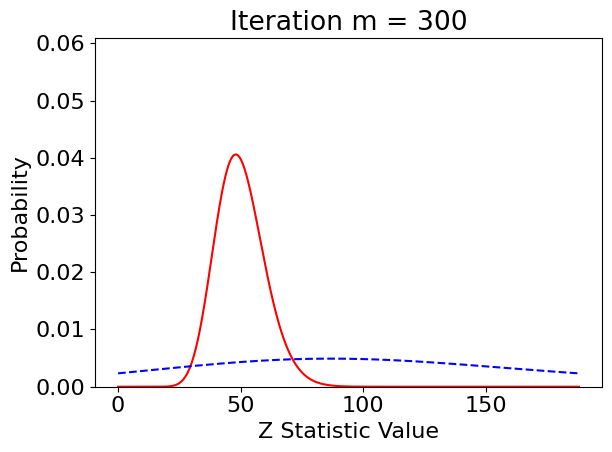

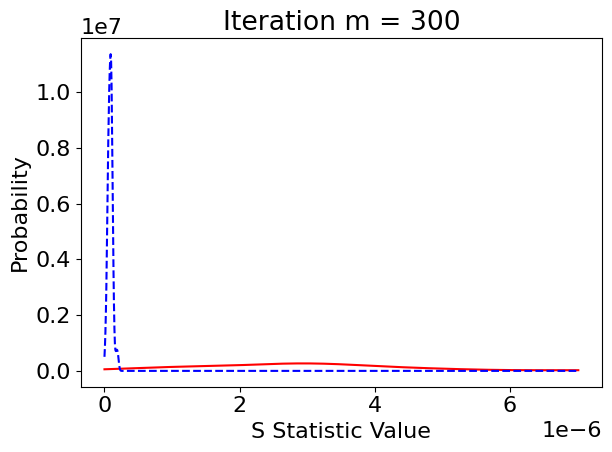

In [7]:
reorth = False
random_search = False
hist_z = False
post_rank = 50
samples = 50
it = [10,100,300]

s_tab,z_tab = test_statistics_plots(AVec, x0, sqrt_prior, it, samples, reorth, 
                                    post_rank, random_search, hist_z, tol, legend=legend, advanced_mean=True, seed=seed)

print("S statistic results \n ")
print(matrix2tabular(s_tab))
print("\n Z statistic results \n ")
print(matrix2tabular(z_tab))

plt.figure(1)
#plt.savefig('UQ-Images/Kry15_Z_1NR_Adv.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/Kry15_S_1NR_Adv.pdf')
plt.figure(3)
#plt.savefig('UQ-Images/Kry15_Z_10NR_Adv.pdf')
plt.figure(4)
#plt.savefig('UQ-Images/Kry15_S_10NR_Adv.pdf')
plt.figure(5)
#plt.savefig('UQ-Images/Kry15_Z_80NR_Adv.pdf')
plt.figure(6)
#plt.savefig('UQ-Images/Kry15_S_80NR_Adv.pdf')

## Calibrated BayesCG

S statistic results 
 
$ 10.0 $ & $ 1.79 \times 10^{3} $ & $ 1.8 \times 10^{3} $ & $ 4.83 \times 10^{-12} $ \\
$ 100.0 $ & $ 1.7 \times 10^{3} $ & $ 1.71 \times 10^{3} $ & $ 3.52 \times 10^{-12} $ \\
$ 300.0 $ & $ 1.52 \times 10^{3} $ & $ 1.51 \times 10^{3} $ & $ 2.43 \times 10^{-12} $ \\


 Z statistic results 
 
$ 10.0 $ & $ 1.79 \times 10^{3} $ & $ 1.8 \times 10^{3} $ & $ 7.91 \times 10^{-2} $ \\
$ 100.0 $ & $ 1.7 \times 10^{3} $ & $ 1.71 \times 10^{3} $ & $ 0.116 $ \\
$ 300.0 $ & $ 1.51 \times 10^{3} $ & $ 1.51 \times 10^{3} $ & $ 0.13 $ \\



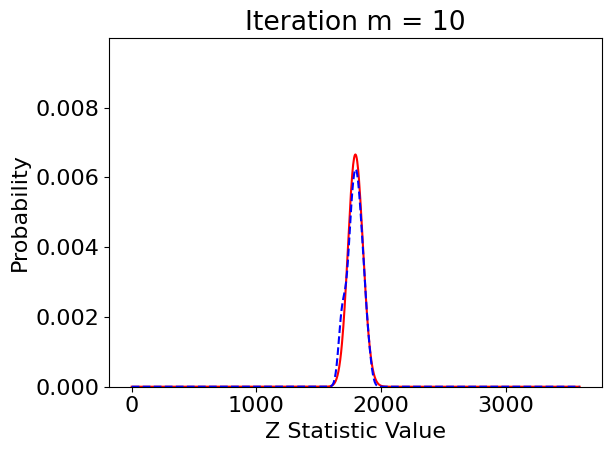

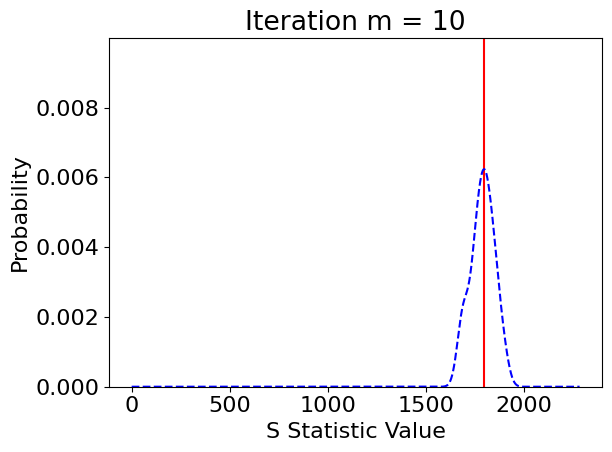

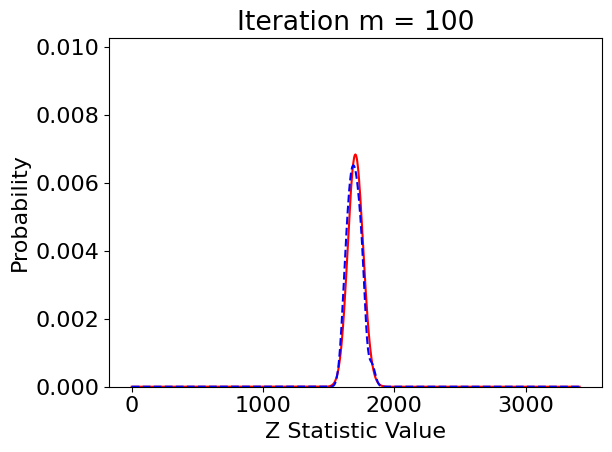

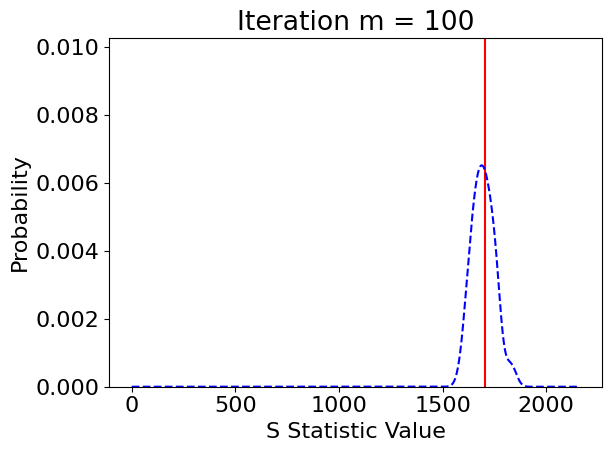

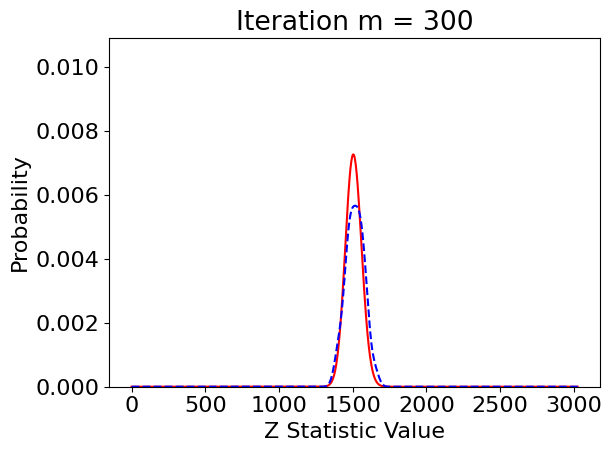

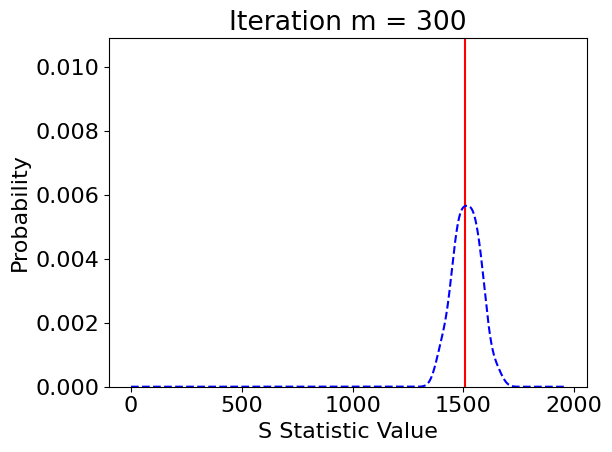

In [8]:
reorth = True
random_search = True
hist_z = False
post_rank = None
samples = 50
it = [10,100,300]

s_tab,z_tab = test_statistics_plots(AVec, x0, sqrt_prior, it, samples, reorth, 
                                    post_rank, random_search, hist_z, tol, legend=legend, seed=seed)

print("S statistic results \n ")
print(matrix2tabular(s_tab))
print("\n Z statistic results \n ")
print(matrix2tabular(z_tab))

plt.figure(1)
#plt.savefig('UQ-Images/Rand_Z_1.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/Rand_S_1.pdf')
plt.figure(3)
#plt.savefig('UQ-Images/Rand_Z_10.pdf')
plt.figure(4)
#plt.savefig('UQ-Images/Rand_S_10.pdf')
plt.figure(5)
#plt.savefig('UQ-Images/Rand_Z_80.pdf')
plt.figure(6)
#plt.savefig('UQ-Images/Rand_S_80.pdf')


## Convergence Plots

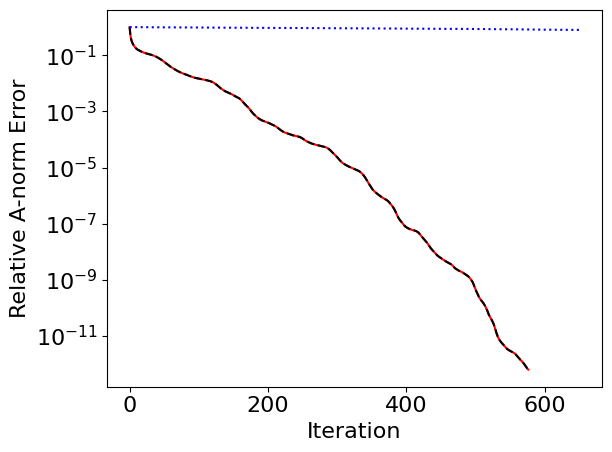

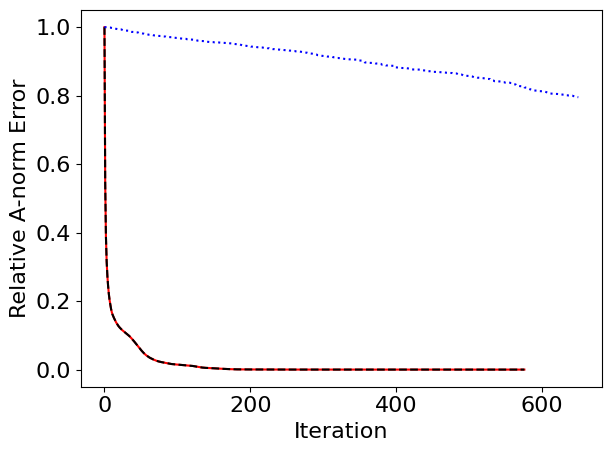

In [9]:
it = 650

# With Reorthogonalization

reorth = True
convergence_plots(AVec, InvAVec, xTrue, x0, it, reorth, NormA, tol, legend=legend)

plt.figure(1)
#plt.savefig('UQ-Images/Convergence.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/ConvergenceNotLog.pdf')



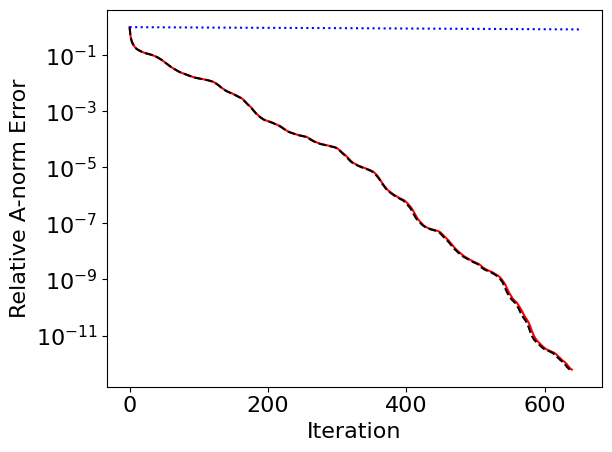

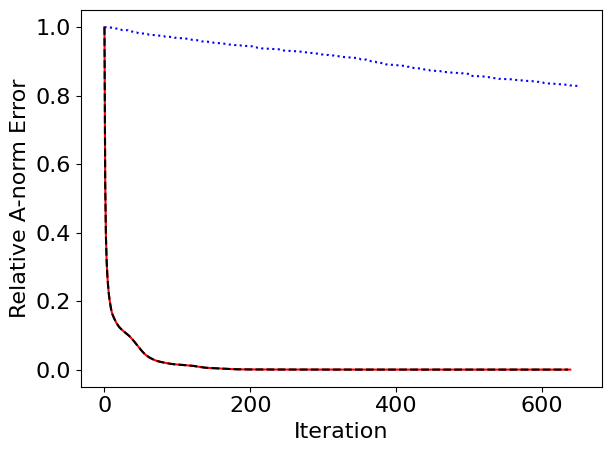

In [10]:
# Without Reorthogonalization

reorth = False
convergence_plots(AVec, InvAVec, xTrue, x0, it, reorth, NormA, tol, legend=legend)


plt.figure(1)
#plt.savefig('UQ-Images/ConvergenceNR.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/ConvergenceNotLogNR.pdf')



## Effect of Convergence Speed on Calibration

In [2]:
np.random.seed(seed)

N = 48

A, SVD_A = random_matrix_generator(N, 4)

U = SVD_A['U']
S = SVD_A['S']
SqrtInvA = U*(S**(-1/2))
CondA = max(S)/min(S)
NormA = max(S)
sqrt_prior = SqrtInvA

def AVec(w):
    return A@w

def InvAVec(w):
    return (U*(S**-1))@(U.T@w)

x0 = np.zeros(N)
xTrue = mv_normal(x0,SqrtInvA)
b = AVec(xTrue)


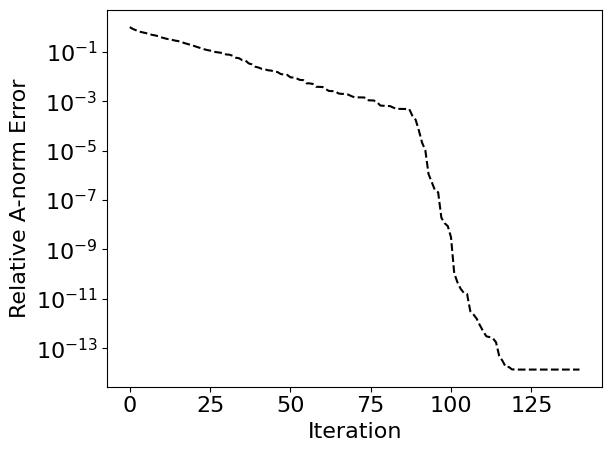

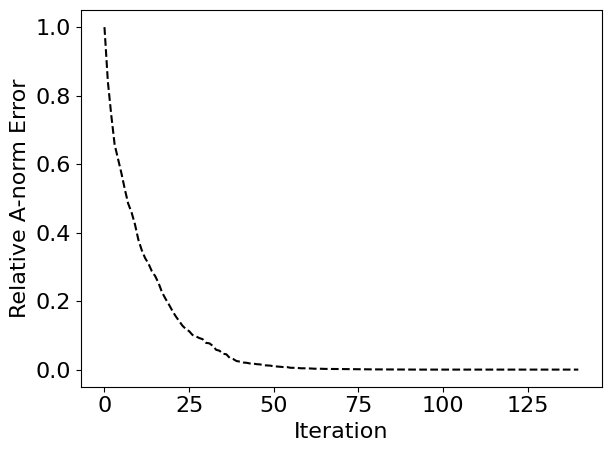

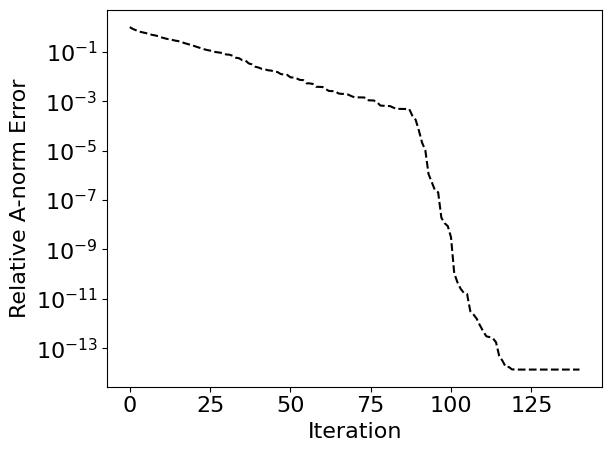

In [3]:
it = 140
reorth = False
tol = 1e-20
legend = False

convergence_plots(AVec, InvAVec, xTrue, x0, 140, reorth, NormA, tol, legend=legend, prior=2)

plt.figure(1)
#plt.savefig('UQ-Images/Convergence48.pdf')


S statistic results 
 
$ 40.0 $ & $ 0.564 $ & $ 0.146 $ & $ 0.159 $ \\
$ 100.0 $ & $ 6.28 \times 10^{-16} $ & $ 5.66 \times 10^{-16} $ & $ 1.81 \times 10^{-15} $ \\


 Z statistic results 
 
$ 40.0 $ & $ 1.54 \times 10^{3} $ & $ 4.0 $ & $ 0.991 $ \\
$ 100.0 $ & $ 1.68 $ & $ 1.0 $ & $ 0.683 $ \\



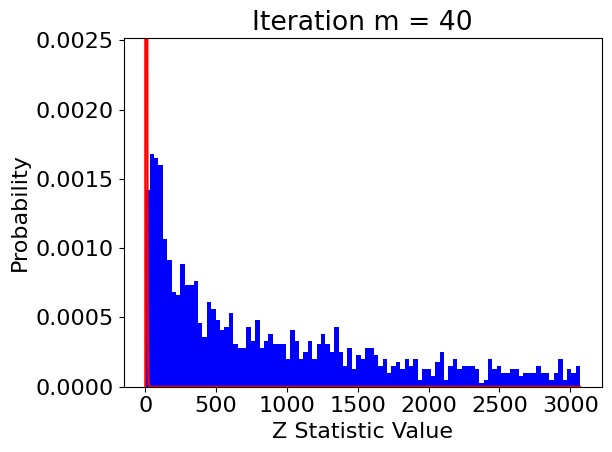

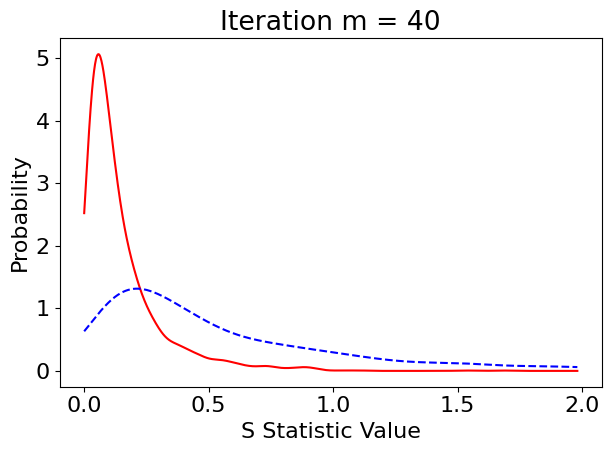

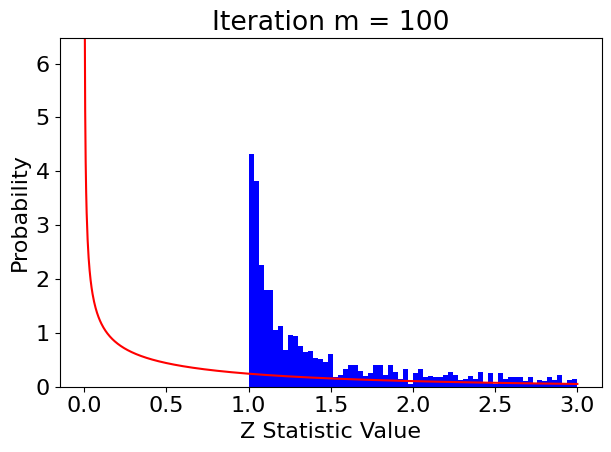

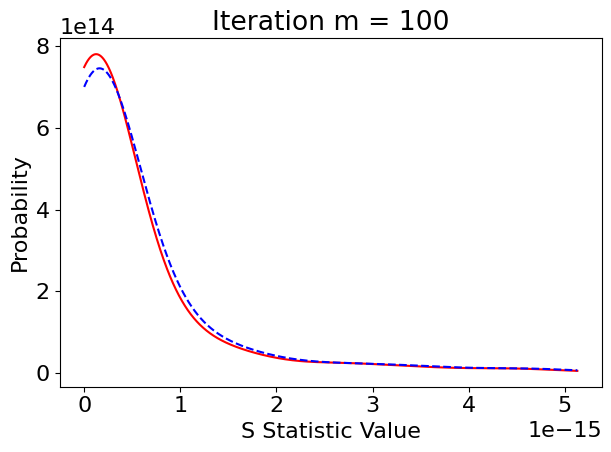

In [4]:
reorth = False
random_search = False
hist_z = True
post_rank = 4
samples = 2000
it = [40,100]

s_tab,z_tab = test_statistics_plots(AVec, x0, sqrt_prior, it, samples, reorth, 
                                    post_rank, random_search, hist_z, tol, legend=legend, seed=seed)

print("S statistic results \n ")
print(matrix2tabular(s_tab))
print("\n Z statistic results \n ")
print(matrix2tabular(z_tab))

plt.figure(1)
#plt.savefig('UQ-Images/48_Z_40.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/48_S_40.pdf')
plt.figure(3)
#plt.savefig('UQ-Images/48_Z_100.pdf')
plt.figure(4)
#plt.savefig('UQ-Images/48_S_100.pdf')



## Calibration Images

[0. 0.] [[ 1.76405235  0.60023581]
 [ 0.97873798  3.3613398 ]
 [ 1.86755799 -1.46591682]
 [ 0.95008842 -0.22703581]
 [-0.10321885  0.61589775]]


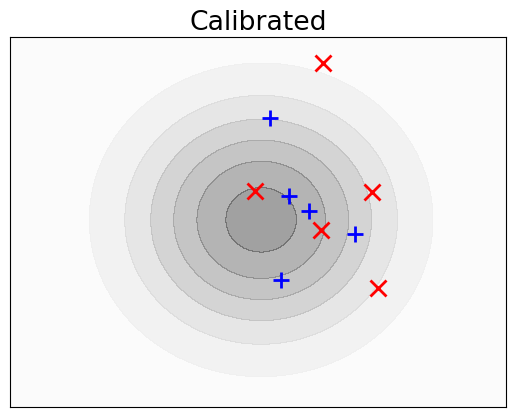

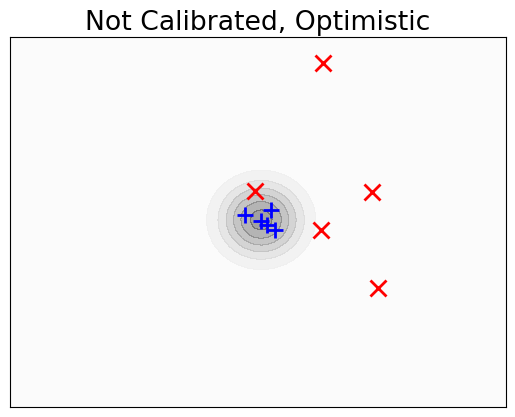

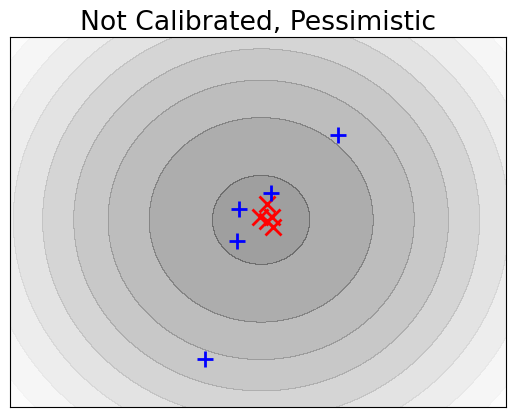

In [11]:


np.random.seed(0)

A = np.diag([1.0/2,1.0/3])
InvA = np.diag(np.diag(A)**-1)
x0 = np.zeros(2)

InvB = np.diag([2,3])

xTrue = mv_normal(x0,InvB**1/2,5)
print(x0,xTrue)
postTrue = mv_normal(x0,InvA**1/2,5)
postOptimistic = mv_normal(x0,(0.1*InvA)**1/2,5)
postPessimistic = mv_normal(x0,(10*InvA)**1/2,5)

x_plot,y_plot = np.mgrid[-4:4:.1,-4:4:.1]
grid = np.dstack((x_plot,y_plot))

prior = stats.multivariate_normal(x0,InvA)
optimistic = stats.multivariate_normal(x0,0.1*InvA)
pessimistic = stats.multivariate_normal(x0,10*InvA)


plt.figure(1)
plt.plot(xTrue.T[0],xTrue.T[1],'xr', markersize=12, mew=2)
plt.plot(postTrue.T[0],postTrue.T[1],'+b', markersize=12, mew=2)
plt.contourf(x_plot,y_plot,prior.pdf(grid),cmap='Greys',alpha = .4)
plt.xticks([])
plt.yticks([])
plt.title('Calibrated')

plt.figure(2)
plt.plot(xTrue.T[0],xTrue.T[1],'xr', markersize=12, mew=2)
plt.plot(postOptimistic.T[0],postOptimistic.T[1],'+b', markersize=12, mew=2)
plt.contourf(x_plot,y_plot,optimistic.pdf(grid),cmap='Greys',alpha = .4)
plt.xticks([])
plt.yticks([])
plt.title('Not Calibrated, Optimistic')

plt.figure(3)
plt.plot(xTrue.T[0],xTrue.T[1],'xr', markersize=12, mew=2)
plt.plot(postPessimistic.T[0],postPessimistic.T[1],'+b', markersize=12, mew=2)
plt.contourf(10*x_plot,10*y_plot,pessimistic.pdf(grid),cmap='Greys',alpha = .4)
plt.xticks([])
plt.yticks([])
plt.title('Not Calibrated, Pessimistic')


plt.figure(1)
#plt.savefig('UQ-Images/Calibrated.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/Optimistic.pdf')
plt.figure(3)
#plt.savefig('UQ-Images/Pessimistic.pdf')





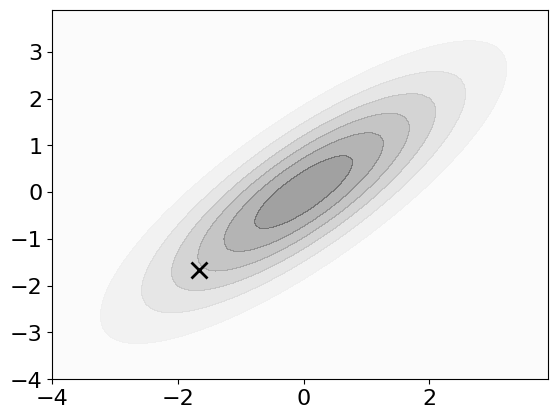

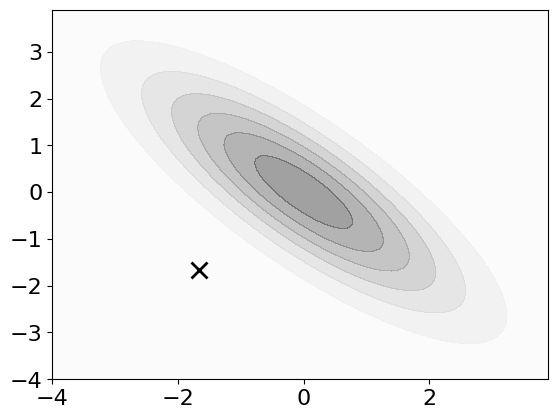

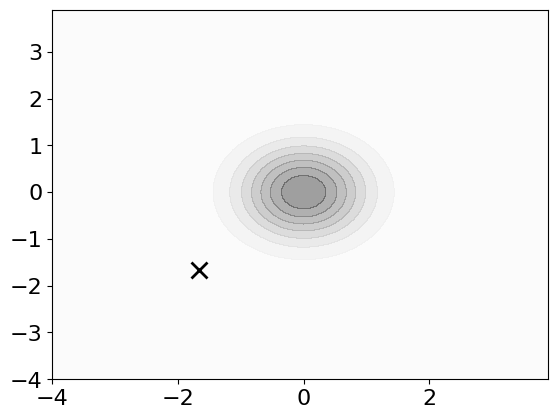

In [12]:
U1 = (1/np.sqrt(2))*np.array([[1,-1],[1,1]])
U2 = (1/np.sqrt(2))*np.array([[-1,1],[1,1]])

S1 = np.diag([5,.5])
S2 = np.diag([.5,.5])

A1 = U1@S1@U1.T
A2 = U2@S1@U2.T
A3 = U2@S2@U2.T

x0 = np.zeros(2)
xTrue = -np.sqrt(5.5/2)*np.array([1,1])

dist1 = stats.multivariate_normal(x0,A1)
dist2 = stats.multivariate_normal(x0,A2)
dist3 = stats.multivariate_normal(x0,A3)

plt.figure(1)
plt.contourf(x_plot,y_plot,dist1.pdf(grid),cmap='Greys',alpha = .4)
plt.plot(xTrue[0],xTrue[1],'xk', markersize=12, mew=2)

plt.figure(2)
plt.contourf(x_plot,y_plot,dist2.pdf(grid),cmap='Greys',alpha = .4)
plt.plot(xTrue[0],xTrue[1],'xk', markersize=12, mew=2)

plt.figure(3)
plt.contourf(x_plot,y_plot,dist3.pdf(grid),cmap='Greys',alpha = .4)
plt.plot(xTrue[0],xTrue[1],'xk', markersize=12, mew=2)

plt.figure(1)
#plt.savefig('UQ-Images/CalibratedZS.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/CalibratedS.pdf')
plt.figure(3)
#plt.savefig('UQ-Images/NotCalibrated.pdf')



V [[ 0.50709255 -0.27602622]
 [ 0.3380617   0.621059  ]]
Phi [[4.82857143 0.        ]
 [0.         0.17142857]]
x1 [1.11428571 0.74285714]


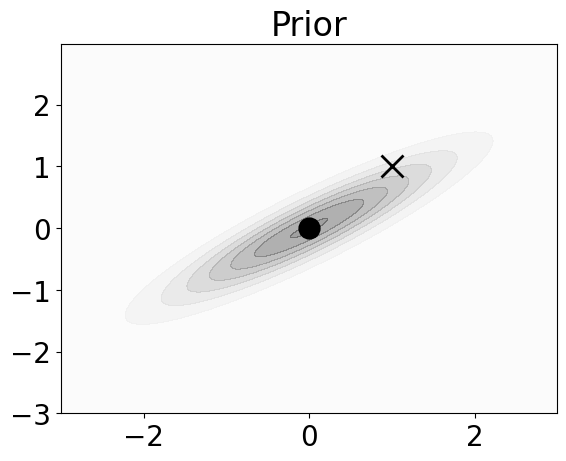

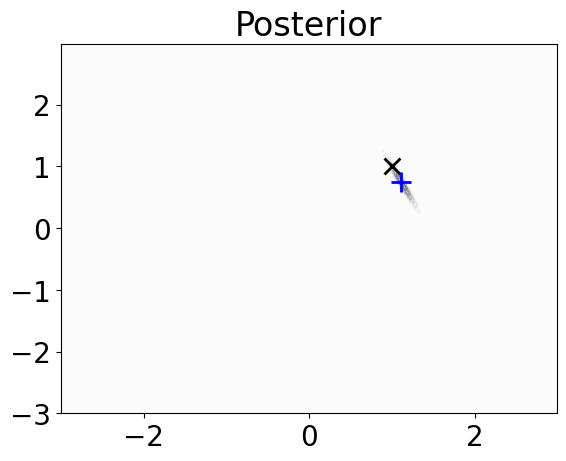

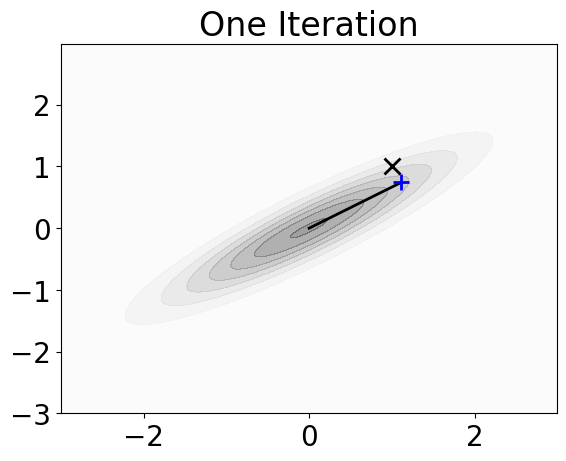

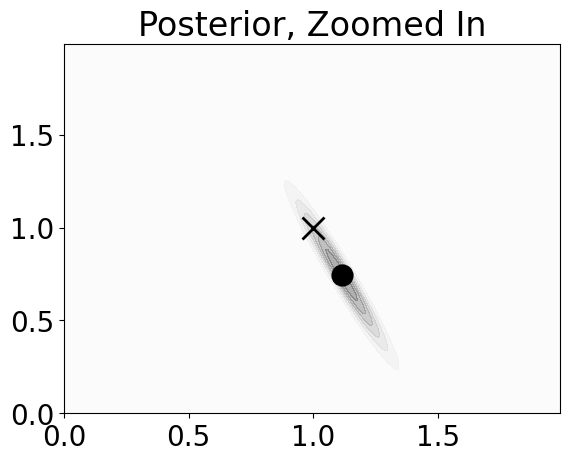

In [3]:
plt.rcParams.update({'font.size': 20})

A= np.array([[3,0],[0,2]])
xTrue = np.ones(2)
b = A@xTrue
x0 = np.zeros(2)
V = np.zeros((2,2))

r0 = b - A@x0
v1 = r0
Av1 = A@v1
eta1 = np.inner(v1,Av1)
gamma1 = np.inner(r0,r0)/eta1
x1 = x0 + gamma1*v1
V[:,0] = v1/np.sqrt(eta1)

r1 = b - A@x1
delta = np.inner(r1,r1)/np.inner(r0,r0)
v2 = r1 + delta*v1
Av2 = A@v2
eta2 = np.inner(v2,Av2)
gamma2 = np.inner(r1,r1)/eta2
x2 = x1 + gamma2*v2
V[:,1] = v2/np.sqrt(eta2)
Phi = np.diag(np.array([gamma1*np.inner(r0,r0), gamma2*np.inner(r1,r1)]))

print('V',V)
print('Phi',Phi)
print('x1',x1)

s1 = np.sqrt(Phi[0,0])*V[:,0]
s2 = np.sqrt(Phi[1,1])*V[:,1]

Gamma0 = V@Phi@V.T
Gamma1 = Phi[1,1]*np.outer(V[:,1],V[:,1].T)

PhiAlt = Phi
PhiAlt[0,0] = .2e-2
Gamma1Alt = V@PhiAlt@V.T

prior2d = stats.multivariate_normal(x0,Gamma0)
posterior2d = stats.multivariate_normal(x1,Gamma1Alt)

x_plot1,y_plot1 = np.mgrid[-3:3:.01,-3:3:.01]
grid1 = np.dstack((x_plot1,y_plot1))

x_plot2,y_plot2 = np.mgrid[0:2:.01,0:2:.01]
grid2 = np.dstack((x_plot2,y_plot2))

plt.figure(1)
plt.contourf(x_plot1,y_plot1,prior2d.pdf(grid1),cmap='Greys',alpha = .4)
plt.plot(xTrue[0],xTrue[1],'xk', markersize=16, mew=2)
plt.plot(x0[0],x0[1],'ko', markersize=14, mew=2)
plt.title('Prior')

plt.figure(2)
plt.contourf(x_plot1,y_plot1,posterior2d.pdf(grid1),cmap='Greys',alpha = .4)
plt.plot(xTrue[0],xTrue[1],'xk', markersize=12, mew=2)
plt.plot(x1[0],x1[1],'b+', markersize=14, mew=2)
plt.title('Posterior')

plt.figure(3)
plt.contourf(x_plot1,y_plot1,prior2d.pdf(grid1),cmap='Greys',alpha = .4)
plt.plot(xTrue[0],xTrue[1],'xk', markersize=12, mew=2)
plt.plot([0,s1[0]],[0,s1[1]],'k',linewidth=2)
plt.plot(x1[0],x1[1],'b+', markersize=12, mew=2)
plt.title('One Iteration')

plt.figure(4)
plt.contourf(x_plot2,y_plot2,posterior2d.pdf(grid2),cmap='Greys',alpha = .4)
plt.plot(xTrue[0],xTrue[1],'xk', markersize=16, mew=2)
plt.plot(x1[0],x1[1],'ko', markersize=14, mew=2)
plt.title('Posterior, Zoomed In')


plt.figure(1)
#plt.savefig('UQ-Images/KrylovPrior2d.pdf')
plt.figure(2)
#plt.savefig('UQ-Images/KrylovPosterior2d.pdf')
plt.figure(3)
#plt.savefig('UQ-Images/KrylovStep2d.pdf')
plt.figure(4)
p#lt.savefig('UQ-Images/KrylovPosterior2dZoom.pdf')
